## Multiple Linear Regression

Multiple regression is to learn more about the relationship between several independent variables and a dependent variable.

Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.

Let's see how to do that.

### Step_1 : Importing and Understanding Data

In [1]:
import pandas as pd

In [2]:
# Importing advertising.csv
advertising_multi = pd.read_csv('../datasets/advertising.csv')

In [3]:
# Looking at the first five rows
advertising_multi.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [4]:
# Looking at the last five rows
advertising_multi.tail()

TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

### Step_2: Visualising Data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

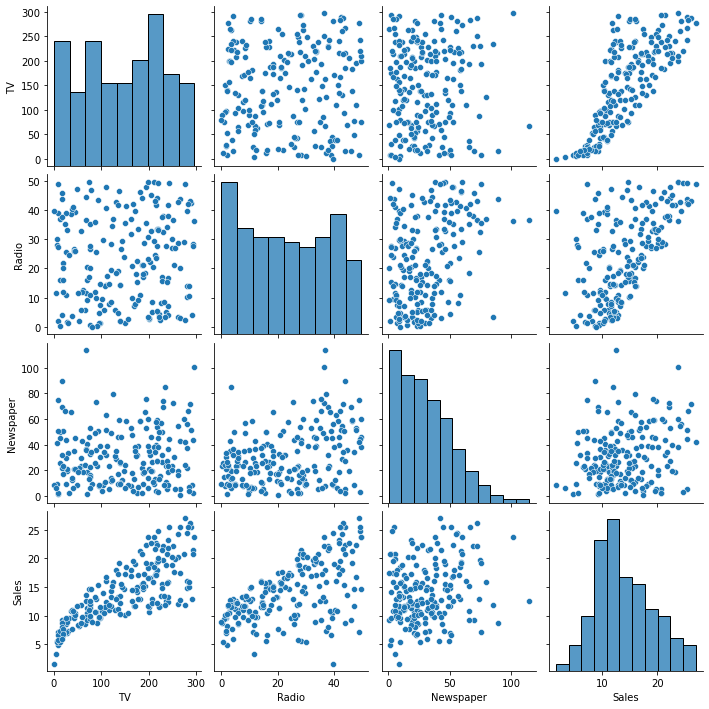

In [6]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(advertising_multi)

In [7]:
advertising_multi.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

In [8]:
advertising_multi

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

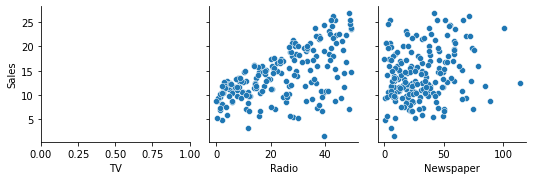

In [9]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(advertising_multi, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='scatter')

### Step_3: Splitting the Data for Training and Testing

In [10]:
# Putting feature variable to X
X = advertising_multi[['TV','Radio']]

# Putting response variable to y
y = advertising_multi['Sales']

In [13]:
type(X)
X.ndim
y.ndim

1

In [14]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2 ,
                                                    random_state=100)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

### Step_4 : Performing Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [21]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression()

### Step_5 : Model Evaluation

In [22]:
# print the intercept
print(lm.intercept_)

2.8521385341918943


In [23]:
lm.coef_

array([0.04562047, 0.18702854])

In [24]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

Coefficient
TV        0.045620
Radio     0.187029

From the above result we may infern that if TV price increses by 1 unit it will affect sales by 0.045 units.

### Step_6 : Predictions

In [25]:
# Making predictions using the model
y_pred = lm.predict(X_test)
y_pred

array([10.48338832, 20.13401279, 16.81911581, 19.04917038, 20.98569002,
       13.25899965, 11.87701573, 12.52134283, 20.52349778, 20.95320875,
       10.94817686, 19.36305765,  6.48207149, 15.36596452,  9.03718007,
        8.06602643, 16.3397385 , 12.07556473, 17.1937352 , 11.2569859 ,
       17.13553786,  9.82148972, 20.68763919, 17.17371449, 15.21496231,
       22.06672593, 19.14497336, 10.08403908, 19.49791583, 14.93920553,
       14.29534847,  7.73931621,  9.94325484, 14.83225118,  7.30269296,
       13.67971823,  7.5669908 , 11.86252791, 13.63402757, 15.10733799])

In [26]:
y_tr = lm.predict(X_train)
mydf = pd.DataFrame()
mydf["actual"]=y_train
mydf["prediction"] = y_tr
mydf

actual  prediction
168    17.1   17.092661
112    14.1   13.747894
171    14.5   14.265602
181    12.2   13.830165
7      13.2   12.001478
..      ...         ...
87     16.0   15.495683
103    14.7   14.641115
67     13.4   11.918983
24      9.7    8.050853
8       4.8    3.637234

[160 rows x 2 columns]

### Step_7: Calculating Error Terms

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [28]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.7016727718979996
r_square_value : 0.9199248376017183


In [35]:
# X_test['TV']

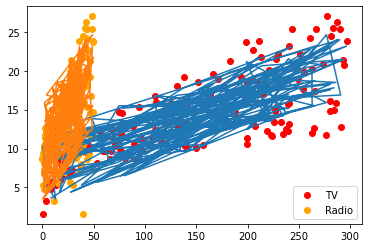

In [45]:
plt.scatter(X_train['TV'], y_train, label="TV", color="red")
plt.scatter(X_train['Radio'], y_train, label="Radio", color="orange")
plt.plot(X_train, y_tr)
plt.legend()